In [8]:
#https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline
!wget -q https://raw.githubusercontent.com/tesemnikov-av/files-rep/master/german_credit_data.csv

1. Класификация и кластеризация Logist, DBSCAN, k-means (какие алгоритмы на чем ошибаются?)
2. Снижение размерности T-SNE, PCA, SVD (какие алгоритмы на чем ошибаются)

In [9]:
!ls -l

total 116
-rw-r--r-- 1 root root 53393 Aug  5 05:33 german_credit_data.csv
-rw-r--r-- 1 root root 53393 Aug  5 05:33 german_credit_data.csv.1
drwxr-xr-x 1 root root  4096 Jul 30 16:30 sample_data


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from keras.utils import to_categorical

In [11]:
df = pd.read_csv('german_credit_data.csv')

In [12]:
male_credit = df["Credit amount"].loc[df["Sex"] == "male"].values
female_credit = df["Credit amount"].loc[df["Sex"] == "female"].values

In [13]:
df['Sex'] = df['Sex'].replace(['female','male'],[0,1])
df['Housing'] = df['Housing'].replace(['own','rent','free'],[0,1,2])
df['Risk'] = df['Risk'].replace(['good','bad'],[0,1])

In [14]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,0,NaN,little,1169,6,radio/TV,0
1,1,22,0,2,0,little,moderate,5951,48,radio/TV,1
2,2,49,1,1,0,little,NaN,2096,12,education,0
3,3,45,1,2,2,little,little,7882,42,furniture/equipment,0
4,4,53,1,2,2,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,0,1,0,little,NaN,1736,12,furniture/equipment,0
996,996,40,1,3,0,little,little,3857,30,car,0
997,997,38,1,2,0,little,NaN,804,12,radio/TV,0
998,998,23,1,2,2,little,little,1845,45,radio/TV,1


In [15]:
df2 = df[['Sex','Age','Job','Housing', 'Credit amount' , 'Duration']]

In [16]:
import plotly.express as px

fig = px.scatter(df, x="Credit amount", y="Age",
	         size="Duration", color="Risk",
                 hover_name="Sex", log_x=True, size_max=60)
fig.show()

In [17]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
df2

,Sex,Age,Job,Housing,Credit amount,Duration
0,1,67,2,0,1169,6
1,0,22,2,0,5951,48
2,1,49,1,0,2096,12
3,1,45,2,2,7882,42
4,1,53,2,2,4870,24
...,...,...,...,...,...,...
995,0,31,1,0,1736,12
996,1,40,3,0,3857,30
997,1,38,2,0,804,12
998,1,23,2,2,1845,45


In [19]:
clusterer = KMeans(n_clusters=2)
preds = clusterer.fit_predict(df2)

In [20]:
df['Preds_K-means'] = preds

In [21]:
df2

,Sex,Age,Job,Housing,Credit amount,Duration
0,1,67,2,0,1169,6
1,0,22,2,0,5951,48
2,1,49,1,0,2096,12
3,1,45,2,2,7882,42
4,1,53,2,2,4870,24
...,...,...,...,...,...,...
995,0,31,1,0,1736,12
996,1,40,3,0,3857,30
997,1,38,2,0,804,12
998,1,23,2,2,1845,45


In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [23]:
principalDf

,principal component 1,principal component 2
0,-2102.286131,32.888731
1,2679.802958,-17.291351
2,-1175.275865,14.428116
3,4610.783163,7.115933
4,1598.746930,17.179961
...,...,...
995,-1535.276966,-3.406518
996,585.764842,2.937750
997,-2467.272629,3.153341
998,-1426.190138,-17.200129


In [24]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(principalDf)
    centers = clusterer.cluster_centers_

    score = silhouette_score(principalDf, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7222751205055112)
For n_clusters = 3, silhouette score is 0.6476372014044387)
For n_clusters = 4, silhouette score is 0.6121015598632058)
For n_clusters = 5, silhouette score is 0.5788972360656826)
For n_clusters = 6, silhouette score is 0.5775796787670741)
For n_clusters = 7, silhouette score is 0.5780734928452669)
For n_clusters = 8, silhouette score is 0.5728594560393943)
For n_clusters = 9, silhouette score is 0.5776260863500629)


In [25]:
df.head(1)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Preds_K-means
0,0,67,1,2,0,NaN,little,1169,6,radio/TV,0,0


In [26]:
clusterer = KMeans(n_clusters=2)
preds = clusterer.fit_predict(principalDf)

In [27]:
principalDf['A'] = df['Risk']
principalDf['P'] = preds

In [28]:
principalDf['principal component 1']

0     -2102.286131
1      2679.802958
2     -1175.275865
3      4610.783163
4      1598.746930
          ...     
995   -1535.276966
996     585.764842
997   -2467.272629
998   -1426.190138
999    1304.800540
Name: principal component 1, Length: 1000, dtype: float64

In [29]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Text(0.5, 1.0, 'K_Means')

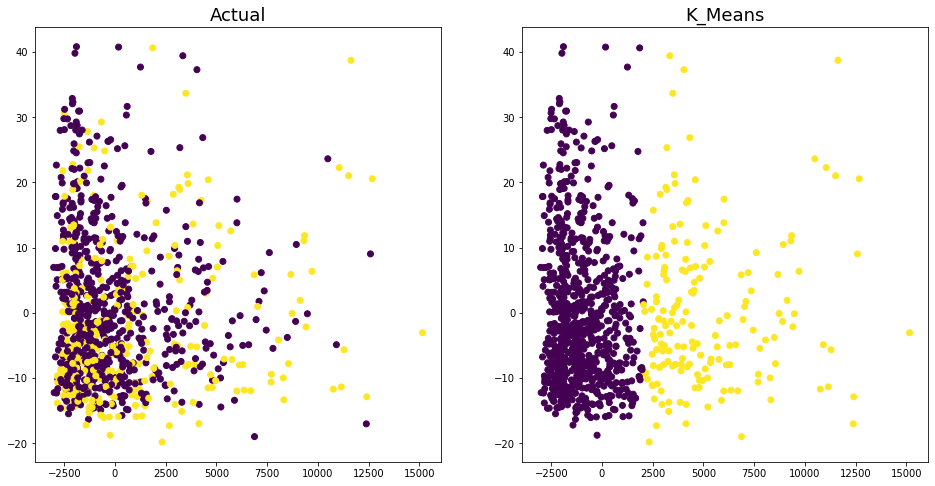

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['A'])
axes[1].scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['P'])
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

In [31]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [32]:
centers = [[1, 1], [-2, -1], [3, -1] , [2,1], [1,0]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X, y = make_blobs(n_samples=100, centers=5, n_features=2)

In [33]:
X

array([[ 4.75597511, -6.5055149 ],
       [-0.51783075,  3.42545554],
       [ 6.09562692, -1.51123629],
       [ 4.05234961,  2.09726029],
       [-8.5741722 , -3.37778622],
       [ 3.67108491, -0.08431853],
       [-0.75389268,  8.45003968],
       [-1.13418799,  9.86016806],
       [ 4.44522741, -4.68564844],
       [ 5.57370701,  0.71254461],
       [-1.63838972,  9.87984172],
       [ 3.55605953, -6.57484179],
       [-7.64133263, -3.41119302],
       [ 3.01788777, -6.27021567],
       [-7.83919921, -4.88285288],
       [ 5.3645747 , -0.0155494 ],
       [-3.54003354,  3.54174265],
       [-8.41476391, -2.2593385 ],
       [-7.72003151, -4.72565459],
       [ 5.11901069,  1.94373285],
       [-0.52930593,  8.92626683],
       [-4.21532693,  9.05768316],
       [-4.30567807,  3.09025801],
       [ 5.64389461,  1.35348052],
       [ 2.90825595, -6.5916338 ],
       [-8.02812255, -3.22910338],
       [ 4.71017037,  1.19144526],
       [ 2.60370987, -6.30686132],
       [ 3.2167245 ,

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

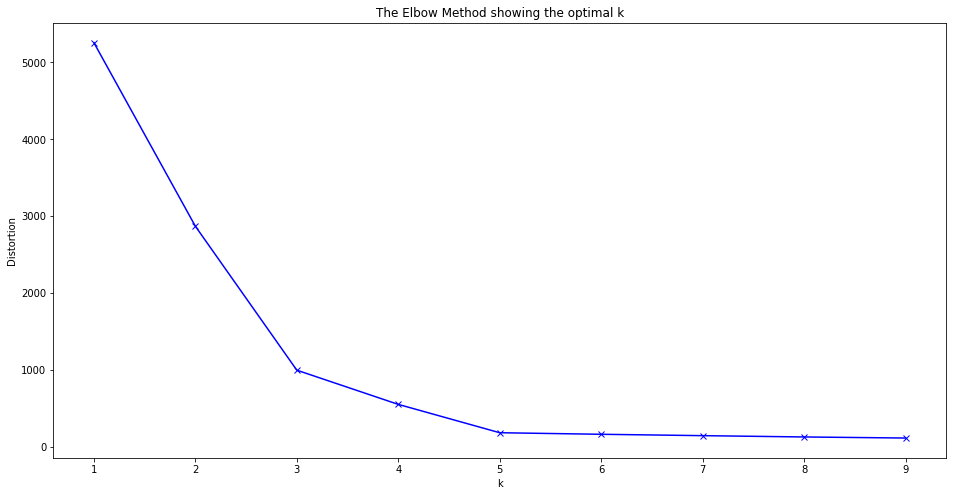

In [34]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [35]:
from sklearn.metrics import silhouette_score
distortions = []

for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    distortions.append(score)
    # print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Text(0.5, 1.0, 'Silhouette (clustering)')

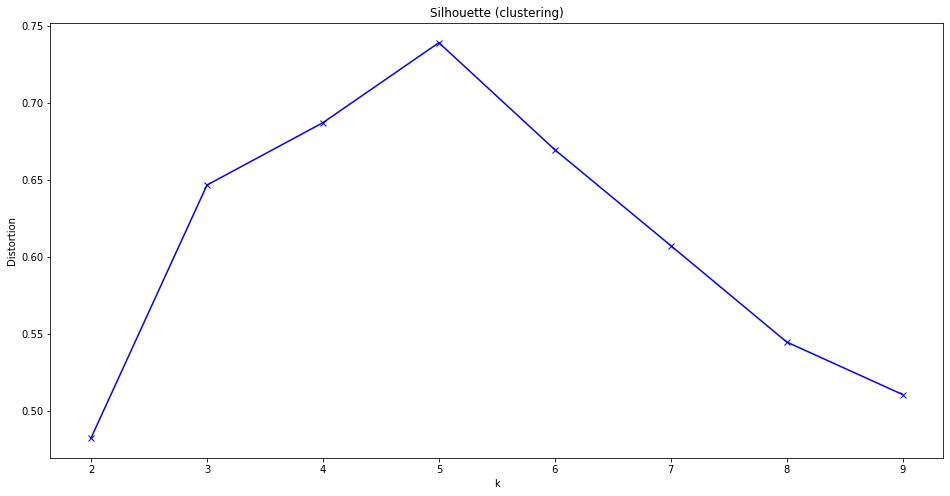

In [36]:
plt.figure(figsize=(16,8))
plt.plot(range(2,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Silhouette (clustering)')

In [37]:
clusterer = KMeans(n_clusters=5)
KMeans_preds = clusterer.fit_predict(X)

In [38]:
# https://scikit-learn.org/stable/modules/clustering.html
# https://habr.com/ru/post/321216/

In [39]:
# K-MODES k-prototypes

In [40]:
# https://scikit-learn.org/stable/modules/clustering.html

In [41]:
X

array([[ 4.75597511, -6.5055149 ],
       [-0.51783075,  3.42545554],
       [ 6.09562692, -1.51123629],
       [ 4.05234961,  2.09726029],
       [-8.5741722 , -3.37778622],
       [ 3.67108491, -0.08431853],
       [-0.75389268,  8.45003968],
       [-1.13418799,  9.86016806],
       [ 4.44522741, -4.68564844],
       [ 5.57370701,  0.71254461],
       [-1.63838972,  9.87984172],
       [ 3.55605953, -6.57484179],
       [-7.64133263, -3.41119302],
       [ 3.01788777, -6.27021567],
       [-7.83919921, -4.88285288],
       [ 5.3645747 , -0.0155494 ],
       [-3.54003354,  3.54174265],
       [-8.41476391, -2.2593385 ],
       [-7.72003151, -4.72565459],
       [ 5.11901069,  1.94373285],
       [-0.52930593,  8.92626683],
       [-4.21532693,  9.05768316],
       [-4.30567807,  3.09025801],
       [ 5.64389461,  1.35348052],
       [ 2.90825595, -6.5916338 ],
       [-8.02812255, -3.22910338],
       [ 4.71017037,  1.19144526],
       [ 2.60370987, -6.30686132],
       [ 3.2167245 ,

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

a = scaler.fit_transform(X)

In [43]:
a

array([[ 1.18929050e+00, -1.25059424e+00],
       [ 7.81748265e-02,  5.61294939e-01],
       [ 1.47153603e+00, -3.39396347e-01],
       [ 1.04104664e+00,  3.18967905e-01],
       [-1.61918141e+00, -6.79945303e-01],
       [ 9.60719609e-01, -7.90575524e-02],
       [ 2.84399442e-02,  1.47802203e+00],
       [-5.16828538e-02,  1.73529763e+00],
       [ 1.12382039e+00, -9.18562608e-01],
       [ 1.36157495e+00,  6.63288122e-02],
       [-1.57910968e-01,  1.73888706e+00],
       [ 9.36485404e-01, -1.26324282e+00],
       [-1.42264542e+00, -6.86040318e-01],
       [ 8.23100289e-01, -1.20766429e+00],
       [-1.46433309e+00, -9.54542233e-01],
       [ 1.31751376e+00, -6.65107387e-02],
       [-5.58560198e-01,  5.82511330e-01],
       [-1.58559636e+00, -4.75886361e-01],
       [-1.43922615e+00, -9.25861664e-01],
       [ 1.26577692e+00,  2.90957078e-01],
       [ 7.57571681e-02,  1.56490889e+00],
       [-7.00834882e-01,  1.58888558e+00],
       [-7.19870580e-01,  5.00138701e-01],
       [ 1.

In [44]:
from sklearn.cluster import DBSCAN
#db = DBSCAN(eps=0.3, min_samples=10).fit(X)

dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_preds = dbscan.fit_predict(a)
dbscan_preds

array([ 3, -1,  2,  2,  0,  2,  1,  1,  3,  2,  1,  3,  0,  3,  0,  2,  4,
        0,  0,  2,  1, -1,  4,  2,  3,  0,  2,  3,  3,  4,  4,  2,  3,  0,
        0,  1,  3,  3,  1,  3,  0,  4,  3,  1,  0,  1,  3,  4,  4,  4,  4,
        0,  1,  1,  0,  1, -1,  0,  2,  0,  3,  3,  0,  0,  1,  0,  4,  3,
       -1,  4,  0,  3,  1,  4,  1,  4,  2,  4,  0,  3,  4,  3,  2, -1,  2,
        4,  2,  2,  2,  2,  1, -1,  1,  2,  3,  4,  0,  1,  1,  4])

In [45]:
# Существует показатели, которые можно использовать для оценки результатов с точки зрения истинной кластеризации. 
# Наиболее важными среди них являются скорректированный коэффициент Рэнда 
# (adjusted Rand index, ARI) и нормализованная взаимная информация (normalized mutual information, NMI),

In [46]:
from scipy.cluster.hierarchy import dendrogram, ward

In [47]:
linkage_array = ward(X)

In [48]:
k

9

Text(0, 0.5, 'Кластерное расстояние')

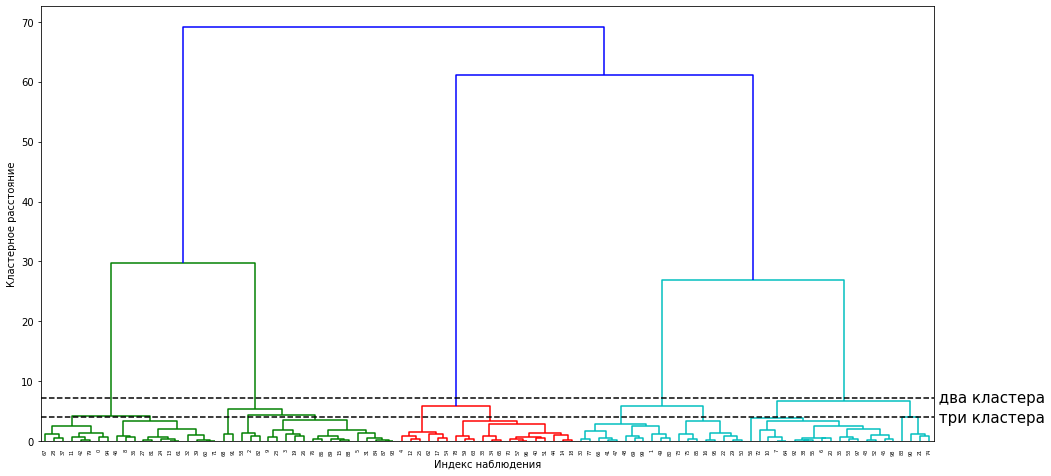

In [49]:
plt.figure(figsize=(16,8))

# теперь строим дендрограмму для массива связей, содержащего расстояния # между кластерами
dendrogram(linkage_array)
# делаем отметки на дереве, соответствующие двум или трем кластерам
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' два кластера', va='center', fontdict={'size': 15}) 
ax.text(bounds[1], 4, ' три кластера', va='center', fontdict={'size': 15}) 

plt.xlabel("Индекс наблюдения")
plt.ylabel("Кластерное расстояние")

In [50]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
aggl_pred = cluster.fit_predict(X)

In [51]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

In [52]:
len(labels_true)

750

In [53]:
len(KMeans_preds)

100

In [54]:
adjusted_rand_score(y,KMeans_preds)

1.0

Text(0.5, 0.98, 'Compare algoritms with Silhouette Score and ARI')

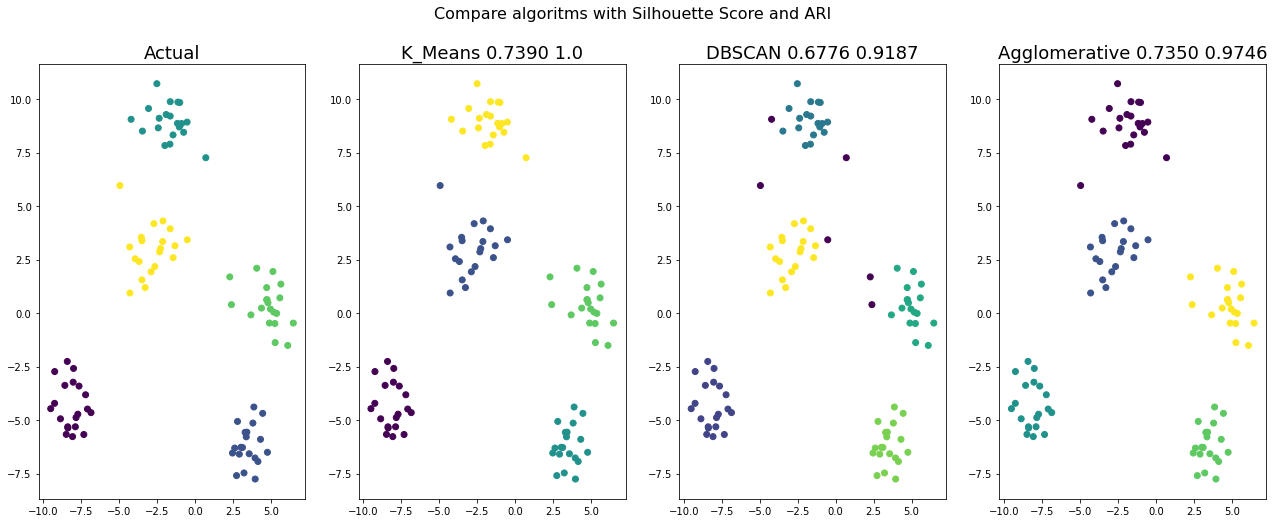

In [55]:
fig, axes = plt.subplots(1, 4, figsize=(22,8))

axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[1].scatter(X[:, 0], X[:, 1], c=KMeans_preds)
axes[2].scatter(X[:, 0], X[:, 1], c=dbscan_preds)
axes[3].scatter(X[:, 0], X[:, 1], c=aggl_pred)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means ' + str(silhouette_score(X,KMeans_preds))[0:6] + ' ' + str(adjusted_rand_score(y,KMeans_preds))[0:6] , fontsize=18)
axes[2].set_title('DBSCAN '+ str(silhouette_score(X,dbscan_preds))[0:6] + ' ' + str(adjusted_rand_score(y,dbscan_preds))[0:6], fontsize=18)
axes[3].set_title('Agglomerative '+ str(silhouette_score(X,aggl_pred))[0:6] + ' ' + str(adjusted_rand_score(y,aggl_pred))[0:6], fontsize=18)
fig.suptitle('Compare algoritms with Silhouette Score and ARI', fontsize=16)

In [56]:
dbscan_preds

array([ 3, -1,  2,  2,  0,  2,  1,  1,  3,  2,  1,  3,  0,  3,  0,  2,  4,
        0,  0,  2,  1, -1,  4,  2,  3,  0,  2,  3,  3,  4,  4,  2,  3,  0,
        0,  1,  3,  3,  1,  3,  0,  4,  3,  1,  0,  1,  3,  4,  4,  4,  4,
        0,  1,  1,  0,  1, -1,  0,  2,  0,  3,  3,  0,  0,  1,  0,  4,  3,
       -1,  4,  0,  3,  1,  4,  1,  4,  2,  4,  0,  3,  4,  3,  2, -1,  2,
        4,  2,  2,  2,  2,  1, -1,  1,  2,  3,  4,  0,  1,  1,  4])

In [57]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(X, color_threshold=7)

#fig['layout'].update({'width':1400, 'height':600, 'title': 'this is the title', 
#                    'xaxis': {'title': 'xaxis label'}, 'yaxis': {'title': 'yaxis label'}})

fig.update_layout(width=1200, height=800 , title = 'fsf')
fig.show()

In [58]:
!wget https://raw.githubusercontent.com/tesemnikov-av/files-rep/master/SPAM%20text%20message%2020170820%20-%20Data.csv

--2020-08-05 05:33:41--  https://raw.githubusercontent.com/tesemnikov-av/files-rep/master/SPAM%20text%20message%2020170820%20-%20Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 485702 (474K) [text/plain]
Saving to: ‘SPAM text message 20170820 - Data.csv’

SPAM text message 2 100%[===================>] 474.32K  --.-KB/s    in 0.07s   

2020-08-05 05:33:41 (6.92 MB/s) - ‘SPAM text message 20170820 - Data.csv’ saved [485702/485702]



In [59]:
df_spam = pd.read_csv('SPAM text message 20170820 - Data.csv')

In [60]:
# df_spam

In [61]:
df_spam['Category'] = df_spam['Category'].replace(['ham','spam'],[0,1])

In [62]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
stop_words = stopwords.words('english')
tfidf = TfidfVectorizer(stop_words=stop_words)

tfidf_matrix = tfidf.fit_transform(df_spam['Message'])

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tfidf_matrix.toarray())

In [64]:
import plotly.express as px
fig = px.scatter(x=principalComponents[:,0], y=principalComponents[:,1], color=df_spam['Category'])
fig.show()

In [65]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit(tfidf_matrix.toarray())

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=7, random_state=42,
             tol=0.0)

In [66]:
#https://medium.com/@zhang_yang/python-code-examples-of-pca-v-s-svd-4e9861db0a71

SyntaxError: ignored

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(tfidf_matrix.toarray())

In [69]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(x=principalComponents[:,0], y=principalComponents[:,1], z=principalComponents[:,2],
              color=df_spam['Category'])
fig.show()

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(df_spam['Category'],tfidf_matrix.toarray())
result=logit_model.fit()
print(result.summary2())